##### """Author: Farheen Bano"""
##### """Copyright Farheen Bano"""

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [66]:
#2 class problem
categories=["COVID","NonCOVID"]
target_folder=["CT_COVID","CT_NonCOVID"]

In [10]:
#define image size 
isize=256

In [68]:
def get_img(path):
    img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    n_array=cv2.resize(img,(isize,isize))
    return n_array

In [69]:
#get the CT Scan images of COVID and Non-COVID patients

def create_data():
    dataset=[]
    for i in categories:
        file_path=r"Data-split/"+i+"/"+target_folder[categories.index(i)]+".txt"
        f = open(file_path, "r")
        for images_name in f.readlines():
            images_path=(r"Images-processed/"+target_folder[categories.index(i)]+"/"+images_name).strip()
            class_num=categories.index(i)
            try:
                n_array=get_img(images_path)
                dataset.append([n_array, class_num])
            except Exception as e:
                pass
    f.close()
    return dataset   
            

<function matplotlib.pyplot.show(*args, **kw)>

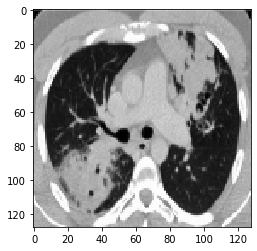

In [70]:
path=r"Images-processed/CT_NonCOVID/33%1.jpg"
img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
n_array=cv2.resize(img,(isize,isize))
plt.imshow(n_array,cmap="gray")
plt.show 

In [71]:
train_dataset=[]

In [72]:
train_dataset=create_data()

In [73]:
#no. of dataset of each category

count0=0
count1=0
for j in train_dataset:
    if j[1]==0:
        count0=count0+1
    else:
        count1=count1+1
print(count0)
print(count1)

345
345


In [74]:
print(len(train_dataset))

690


In [75]:
import random
random.shuffle(train_dataset)

In [76]:
train_x=[]
train_y=[]

In [77]:
for l,m in train_dataset:
    train_x.append(l)
    train_y.append(m)
train_x=np.array(train_x).reshape(-1,isize,isize,1)

In [78]:
train_x=train_x/255.0

In [79]:
train_y = np.array(train_y)

In [80]:
print(train_x)

[[[[1.        ]
   [1.        ]
   [0.98431373]
   ...
   [1.        ]
   [1.        ]
   [0.95294118]]

  [[1.        ]
   [1.        ]
   [0.98431373]
   ...
   [1.        ]
   [1.        ]
   [0.99607843]]

  [[0.99607843]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [0.99215686]
   [1.        ]]

  ...

  [[0.97647059]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [0.8       ]
   [0.96862745]]

  [[0.98823529]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [0.83529412]
   [0.97254902]]

  [[1.        ]
   [0.99607843]
   [1.        ]
   ...
   [1.        ]
   [0.87058824]
   [0.97647059]]]


 [[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0. 

In [81]:
print(train_y)

[0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0
 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0
 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1
 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0
 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0
 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0
 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0
 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1
 1 0 1 0 1 1 0 1 0 0 0 1 

In [82]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(horizontal_flip = True,
                         vertical_flip = True,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,
                         zoom_range = 0.1,
                         rotation_range = 10
                        )

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

from keras.callbacks import ModelCheckpoint
import pickle




In [84]:
#CNN Model

def get_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[isize, isize, 1]))
    model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))


    model.add(tf.keras.layers.Flatten())


    model.add(tf.keras.layers.Dense(units=256, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(units=16, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(units=16, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(units=8, activation='relu'))
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

    return model

In [85]:
model = get_model()
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 64, 64, 16)        4624      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 4096)             

In [86]:
#7 Fold Validation

from sklearn.model_selection import StratifiedKFold
folds = list(StratifiedKFold(n_splits=7, shuffle=True, random_state=1).split(train_x, train_y))

In [87]:
#get callbacks

def get_callbacks(name_weights, patience_lr):
    mcp_save = ModelCheckpoint(name_weights, save_best_only=True, monitor='val_loss', mode='min')
    reduce_lr_loss = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=patience_lr, verbose=1, epsilon=1e-4, mode='min')
    return [mcp_save, reduce_lr_loss]

In [88]:
#plot accuracy and loss graph

import matplotlib.pyplot as plt

def graph(hist):
    plt.figure(1)  

     # summarize history for accuracy  

    plt.subplot(311)  
    plt.plot(hist.history['accuracy'])  
    plt.plot(hist.history['val_accuracy'])  
    plt.title('model accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'test'], loc='upper left')  

     # summarize history for loss  

    plt.subplot(313)  
    plt.plot(hist.history['loss'])  
    plt.plot(hist.history['val_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'test'], loc='upper left')  
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '



Fold  0
  ...
    to  
  ['...']
Train for 39.333333333333336 steps, validate on 100 samples
Epoch 1/20
40/39 [==============================] - 7s 167ms/step - loss: 0.7001 - accuracy: 0.4797 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/20
40/39 [==============================] - 7s 163ms/step - loss: 0.6932 - accuracy: 0.5017 - val_loss: 0.6920 - val_accuracy: 0.5100
Epoch 3/20
40/39 [==============================] - 7s 163ms/step - loss: 0.6948 - accuracy: 0.4949 - val_loss: 0.6925 - val_accuracy: 0.5100
Epoch 4/20
40/39 [==============================] - 7s 167ms/step - loss: 0.6911 - accuracy: 0.5559 - val_loss: 0.6846 - val_accuracy: 0.5800
Epoch 5/20
40/39 [==============================] - 7s 176ms/step - loss: 0.6791 - accuracy: 0.5746 - val_loss: 0.6718 - val_accuracy: 0.5900
Epoch 6/20
40/39 [==============================] - 7s 164ms/step - loss: 0.6602 - accuracy: 0.5847 - val_loss: 0.6613 - val_accuracy: 0.6000
Epoch 7/20
40/39 [==============================] - 7s

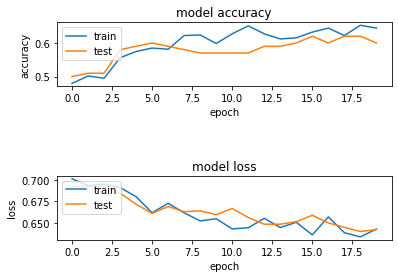

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '



Fold  1
  ...
    to  
  ['...']
Train for 39.333333333333336 steps, validate on 100 samples
Epoch 1/20
40/39 [==============================] - 9s 223ms/step - loss: 0.6945 - accuracy: 0.4763 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
40/39 [==============================] - 7s 184ms/step - loss: 0.6901 - accuracy: 0.4932 - val_loss: 0.6854 - val_accuracy: 0.5000
Epoch 3/20
40/39 [==============================] - 8s 195ms/step - loss: 0.6887 - accuracy: 0.5508 - val_loss: 0.6714 - val_accuracy: 0.6000
Epoch 4/20
40/39 [==============================] - 7s 183ms/step - loss: 0.6739 - accuracy: 0.5932 - val_loss: 0.6710 - val_accuracy: 0.6200
Epoch 5/20
40/39 [==============================] - 8s 212ms/step - loss: 0.6679 - accuracy: 0.6102 - val_loss: 0.6728 - val_accuracy: 0.6000
Epoch 6/20
40/39 [==============================] - 8s 196ms/step - loss: 0.6717 - accuracy: 0.5864 - val_loss: 0.6643 - val_accuracy: 0.6100
Epoch 7/20
40/39 [==============================] - 7s

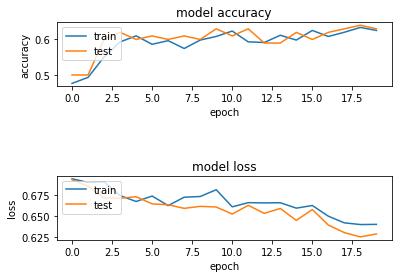

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '



Fold  2
  ...
    to  
  ['...']
Train for 39.46666666666667 steps, validate on 98 samples
Epoch 1/20
40/39 [==============================] - 8s 206ms/step - loss: 0.7056 - accuracy: 0.5084 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/20
40/39 [==============================] - 7s 180ms/step - loss: 0.6898 - accuracy: 0.5405 - val_loss: 0.6888 - val_accuracy: 0.50000s - loss: 0.6891 - accuracy: 0.54
Epoch 3/20
40/39 [==============================] - 8s 192ms/step - loss: 0.6934 - accuracy: 0.5084 - val_loss: 0.6942 - val_accuracy: 0.5000921 - accura
Epoch 4/20
40/39 [==============================] - 7s 179ms/step - loss: 0.6916 - accuracy: 0.5304 - val_loss: 0.6890 - val_accuracy: 0.5000
Epoch 5/20
40/39 [==============================] - 8s 194ms/step - loss: 0.6989 - accuracy: 0.5372 - val_loss: 0.6919 - val_accuracy: 0.5000oss: 0.6965 - accura - ETA: 1s - loss: 0.701
Epoch 6/20
40/39 [==============================] - 7s 171ms/step - loss: 0.6942 - accuracy: 0.5000 - val_lo

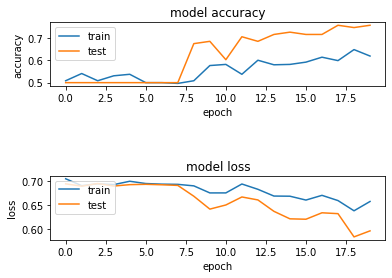

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '



Fold  3
  ...
    to  
  ['...']
Train for 39.46666666666667 steps, validate on 98 samples
Epoch 1/20
40/39 [==============================] - 8s 211ms/step - loss: 0.6955 - accuracy: 0.4966 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 2/20
40/39 [==============================] - 9s 215ms/step - loss: 0.6972 - accuracy: 0.4865 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/20
40/39 [==============================] - 9s 237ms/step - loss: 0.6932 - accuracy: 0.5236 - val_loss: 0.6921 - val_accuracy: 0.6224
Epoch 4/20
40/39 [==============================] - 9s 220ms/step - loss: 0.6923 - accuracy: 0.5321 - val_loss: 0.6907 - val_accuracy: 0.7245
Epoch 5/20
40/39 [==============================] - 7s 187ms/step - loss: 0.6888 - accuracy: 0.5118 - val_loss: 0.6808 - val_accuracy: 0.5816
Epoch 6/20
40/39 [==============================] - 8s 197ms/step - loss: 0.6873 - accuracy: 0.5625 - val_loss: 0.6886 - val_accuracy: 0.5612
Epoch 7/20
40/39 [==============================] - 8s 2

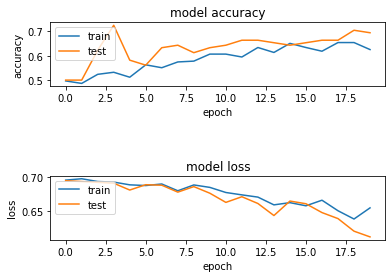

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '



Fold  4
  ...
    to  
  ['...']
Train for 39.46666666666667 steps, validate on 98 samples
Epoch 1/20
40/39 [==============================] - 10s 260ms/step - loss: 0.6947 - accuracy: 0.4966 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 2/20
40/39 [==============================] - 9s 219ms/step - loss: 0.6957 - accuracy: 0.5236 - val_loss: 0.6905 - val_accuracy: 0.5510
Epoch 3/20
40/39 [==============================] - 9s 222ms/step - loss: 0.6945 - accuracy: 0.5084 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 4/20
40/39 [==============================] - 9s 218ms/step - loss: 0.6894 - accuracy: 0.5642 - val_loss: 0.6849 - val_accuracy: 0.6224
Epoch 5/20
40/39 [==============================] - 9s 218ms/step - loss: 0.6935 - accuracy: 0.5456 - val_loss: 0.6854 - val_accuracy: 0.6224
Epoch 6/20
40/39 [==============================] - 9s 218ms/step - loss: 0.6821 - accuracy: 0.5676 - val_loss: 0.6682 - val_accuracy: 0.6837
Epoch 7/20
40/39 [==============================] - 8s 

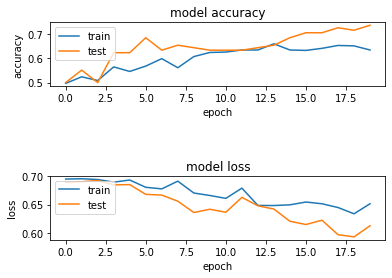

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '



Fold  5
  ...
    to  
  ['...']
Train for 39.46666666666667 steps, validate on 98 samples
Epoch 1/20
40/39 [==============================] - 9s 215ms/step - loss: 0.7097 - accuracy: 0.4882 - val_loss: 0.6914 - val_accuracy: 0.5102
Epoch 2/20
40/39 [==============================] - 8s 192ms/step - loss: 0.6902 - accuracy: 0.5557 - val_loss: 0.6849 - val_accuracy: 0.5714
Epoch 3/20
40/39 [==============================] - 9s 231ms/step - loss: 0.6847 - accuracy: 0.5676 - val_loss: 0.6778 - val_accuracy: 0.6735
Epoch 4/20
40/39 [==============================] - 9s 221ms/step - loss: 0.6856 - accuracy: 0.5473 - val_loss: 0.6593 - val_accuracy: 0.7041
Epoch 5/20
40/39 [==============================] - 9s 215ms/step - loss: 0.6839 - accuracy: 0.5693 - val_loss: 0.6620 - val_accuracy: 0.6327
Epoch 6/20
40/39 [==============================] - 8s 206ms/step - loss: 0.6795 - accuracy: 0.5878 - val_loss: 0.6494 - val_accuracy: 0.6735
Epoch 7/20
40/39 [==============================] - 8s 2

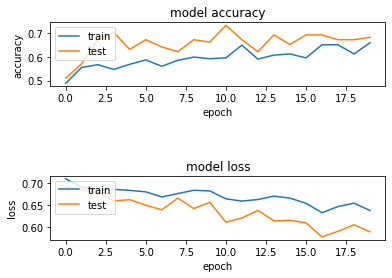

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '



Fold  6
  ...
    to  
  ['...']
Train for 39.46666666666667 steps, validate on 98 samples
Epoch 1/20
40/39 [==============================] - 8s 210ms/step - loss: 0.6967 - accuracy: 0.4578 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/20
40/39 [==============================] - 8s 206ms/step - loss: 0.6925 - accuracy: 0.4932 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/20
40/39 [==============================] - 8s 205ms/step - loss: 0.6961 - accuracy: 0.5084 - val_loss: 0.6885 - val_accuracy: 0.5000
Epoch 4/20
40/39 [==============================] - 9s 214ms/step - loss: 0.6942 - accuracy: 0.5118 - val_loss: 0.6880 - val_accuracy: 0.5000
Epoch 5/20
40/39 [==============================] - 8s 195ms/step - loss: 0.6900 - accuracy: 0.5000 - val_loss: 0.6860 - val_accuracy: 0.5102
Epoch 6/20
40/39 [==============================] - 7s 175ms/step - loss: 0.6900 - accuracy: 0.5270 - val_loss: 0.6694 - val_accuracy: 0.6939
Epoch 7/20
40/39 [==============================] - 8s 2

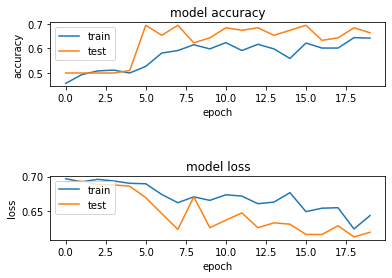

In [89]:
#generate the model

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import np_utils

batch_size=15

for j, (train_idx, val_idx) in enumerate(folds):
    
   
    X_train_cv = train_x[train_idx]
    y_train_cv = train_y[train_idx]
    X_valid_cv = train_x[val_idx]
    y_valid_cv = train_y[val_idx]
    
    name_weights = "saved-models/final_model_fold_" + str(j) + "_weights.h5"
    callbacks = get_callbacks(name_weights = name_weights, patience_lr=10)
    generator = gen.flow(X_train_cv, y_train_cv, batch_size = batch_size)
    model = get_model()
    print('\nFold ',j)
    hist=model.fit_generator(
            generator,
            epochs=20,
            steps_per_epoch=len(X_train_cv)/batch_size,
            shuffle=True,
            validation_data = (X_valid_cv, y_valid_cv),
            callbacks=callbacks,
            verbose=1
    )
    
 
    print(model.evaluate(X_valid_cv, y_valid_cv))    
    

     # summarize history for accuracy  

    graph(hist)
    


In [4]:
from keras.models import model_from_json

In [5]:
#Choose the highest accuracy fold
model = tf.keras.models.load_model('saved-models/final_model_fold_2_weights.h5')
print("Loaded model from disk")

Loaded model from disk


In [6]:
print(model)

In [7]:

from keras.preprocessing import image
from PIL import Image

In [14]:
#to predict an unseen CT Scan image

def predict_img(img_path):
    test_image=image.load_img(img_path,target_size=(isize,isize,1),color_mode="grayscale")
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image,axis=0)
    result=model.predict(test_image)
    if result[0][0]==1:
        prediction ='Non-COVID'
    else:
        prediction='COVID'
    print(prediction)

# ![](Images-processed/CT_COVID/2020.03.22.20040782-p25-1541.png)

In [15]:
predict_img(img_path='Images-processed/CT_COVID/2020.03.22.20040782-p25-1541.png')

COVID
